In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
bankdata = pd.read_csv('C:/Users/Akshay/Downloads/bank-full.csv')

In [3]:
bankdata

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [4]:
bankdata.columns

Index(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'], dtype='object')

In [5]:
bankdata.iloc[:,0:]

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [6]:
bankdata = bankdata.rename(columns = {'age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"': 'cols'})

In [7]:
bankdata

,cols
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [8]:
bankdata.iloc[0,0]

'58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"'

In [9]:
data = pd.DataFrame()

In [10]:
data[["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","y"]] = bankdata['cols'].str.split(';' , expand = True) 

In [11]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45207,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45208,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45209,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""


In [12]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [13]:
data.shape

(45211, 17)

In [14]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


In [15]:
data.dtypes

age          object
job          object
marital      object
education    object
default      object
balance      object
housing      object
loan         object
contact      object
day          object
month        object
duration     object
campaign     object
pdays        object
previous     object
poutcome     object
y            object
dtype: object

# Converting object data types into category & numeric accordingly

In [16]:
data['age'] = data['age'].astype('int64')

In [17]:
data['balance'] = data['balance'].astype('int64')

In [18]:
data['day'].unique()

array(['5', '6', '7', '8', '9', '12', '13', '14', '15', '16', '19', '20',
       '21', '23', '26', '27', '28', '29', '30', '2', '3', '4', '11',
       '17', '18', '24', '25', '1', '10', '22', '31'], dtype=object)

In [19]:
data['day'] = data['day'].astype('int64')

In [20]:
data['duration'] = data['duration'].astype('int64')

In [21]:
data['campaign'].unique()

array(['1', '2', '3', '5', '4', '6', '7', '8', '9', '10', '11', '12',
       '13', '19', '14', '24', '16', '32', '18', '22', '15', '17', '25',
       '21', '43', '51', '63', '41', '26', '28', '55', '50', '38', '23',
       '20', '29', '31', '37', '30', '46', '27', '58', '33', '35', '34',
       '36', '39', '44'], dtype=object)

In [22]:
data['campaign'] = data['campaign'].astype('int64')

In [23]:
data['pdays'].unique()

array(['-1', '151', '166', '91', '86', '143', '147', '89', '140', '176',
       '101', '174', '170', '167', '195', '165', '129', '188', '196',
       '172', '118', '119', '104', '171', '117', '164', '132', '131',
       '123', '159', '186', '111', '115', '116', '173', '178', '110',
       '152', '96', '103', '150', '175', '193', '181', '185', '154',
       '145', '138', '126', '180', '109', '158', '168', '97', '182',
       '127', '130', '194', '125', '105', '102', '26', '179', '28', '183',
       '155', '112', '120', '137', '124', '187', '190', '113', '162',
       '134', '169', '189', '8', '144', '191', '184', '177', '5', '99',
       '133', '93', '92', '10', '100', '156', '198', '106', '153', '146',
       '128', '7', '121', '160', '107', '90', '27', '197', '136', '139',
       '122', '157', '149', '135', '30', '114', '98', '192', '163', '34',
       '95', '141', '31', '199', '94', '108', '29', '268', '247', '253',
       '226', '244', '239', '245', '204', '231', '238', '258', '230'

In [24]:
data['pdays'] = data['pdays'].replace('-1' , '0')

In [25]:
data['pdays'] = data['pdays'].astype('int64')

In [26]:
data['pdays'].value_counts()

0      36954
182      167
92       147
91       126
183      126
       ...  
465        1
529        1
18         1
434        1
831        1
Name: pdays, Length: 559, dtype: int64

In [27]:
data['previous'] = data['previous'].astype('int64')

In [28]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [29]:
data['job'] = data['job'].astype('category')

In [30]:
data['marital'] = data['marital'].astype('category')

In [31]:
data['education'] = data['education'].astype('category')

In [32]:
data['default']=data['default'].astype('category')

In [33]:
data['housing'] = data['housing'].astype('category')

In [34]:
data['loan'] = data['loan'].astype('category')

In [35]:
data['contact'] = data['contact'].astype('category')

In [36]:
data['month'] = data['month'].astype('category')

In [37]:
data['poutcome'] = data['poutcome'].astype('category')

In [38]:
data['y'] = data['y'].astype('category')

In [39]:
data['y'] = data['y'].replace('"no"' , '0')
data['y'] = data['y'].replace('"yes"' , '1')

In [40]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,0,0,"""unknown""",0
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,0,0,"""unknown""",0
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,0,0,"""unknown""",0
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,0,0,"""unknown""",0
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,0,0,"""unknown""",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,0,0,"""unknown""",1
45207,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,0,0,"""unknown""",1
45208,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""",1
45209,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,0,0,"""unknown""",0


In [41]:
data.duplicated().value_counts()

False    45211
dtype: int64

# No duplicated values observed

In [42]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# no missing values

In [43]:
data['y'].unique()

['0', '1']
Categories (2, object): ['0', '1']

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

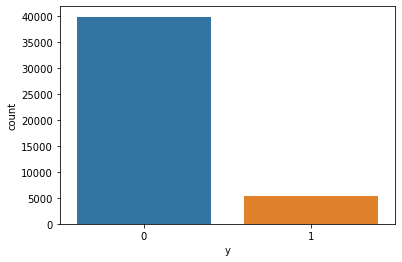

In [44]:
sns.countplot(data['y'])

In [45]:
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [46]:
cat_cols  = data.select_dtypes(include=['category'])

In [47]:
cat_cols

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,"""management""","""married""","""tertiary""","""no""","""yes""","""no""","""unknown""","""may""","""unknown""",0
1,"""technician""","""single""","""secondary""","""no""","""yes""","""no""","""unknown""","""may""","""unknown""",0
2,"""entrepreneur""","""married""","""secondary""","""no""","""yes""","""yes""","""unknown""","""may""","""unknown""",0
3,"""blue-collar""","""married""","""unknown""","""no""","""yes""","""no""","""unknown""","""may""","""unknown""",0
4,"""unknown""","""single""","""unknown""","""no""","""no""","""no""","""unknown""","""may""","""unknown""",0
...,...,...,...,...,...,...,...,...,...,...
45206,"""technician""","""married""","""tertiary""","""no""","""no""","""no""","""cellular""","""nov""","""unknown""",1
45207,"""retired""","""divorced""","""primary""","""no""","""no""","""no""","""cellular""","""nov""","""unknown""",1
45208,"""retired""","""married""","""secondary""","""no""","""no""","""no""","""cellular""","""nov""","""success""",1
45209,"""blue-collar""","""married""","""secondary""","""no""","""no""","""no""","""telephone""","""nov""","""unknown""",0


In [48]:
cat_cols.drop('y', axis =1,inplace = True)

C:\Users\Akshay\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Scaling the data

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()

In [51]:
cat_cols = cat_cols.apply(le.fit_transform)

In [52]:
cat_cols

,job,marital,education,default,housing,loan,contact,month,poutcome
0,4,1,2,0,1,0,2,8,3
1,9,2,1,0,1,0,2,8,3
2,2,1,1,0,1,1,2,8,3
3,1,1,3,0,1,0,2,8,3
4,11,2,3,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...
45206,9,1,2,0,0,0,0,9,3
45207,5,0,0,0,0,0,0,9,3
45208,5,1,1,0,0,0,0,9,2
45209,1,1,1,0,0,0,1,9,3


In [53]:
target = data['y']

In [54]:
target

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: category
Categories (2, object): ['0', '1']

# Feature selection

In [55]:
from sklearn.feature_selection import chi2,SelectKBest

In [56]:
chisq = SelectKBest(score_func=chi2,k='all')

In [57]:
chisq.fit(cat_cols,target)

SelectKBest(k='all', score_func=<function chi2 at 0x0000026301371CA0>)

In [58]:
feature_score = pd.DataFrame({"Score":chisq.scores_,"P_Value":chisq.pvalues_},index=cat_cols.columns)

In [59]:
feature_score

,Score,P_Value
job,182.452260,1.412576e-41
marital,29.766067,4.874498e-08
education,90.617723,1.742922e-21
default,22.313875,2.315277e-06
housing,388.949715,1.401285e-86
loan,176.516137,2.793375e-40
contact,1253.814109,1.230845e-274
month,44.321905,2.785815e-11
poutcome,104.677479,1.437254e-24


In [60]:
feature_score.sort_values('Score',ascending = False)

,Score,P_Value
contact,1253.814109,1.230845e-274
housing,388.949715,1.401285e-86
job,182.452260,1.412576e-41
loan,176.516137,2.793375e-40
poutcome,104.677479,1.437254e-24
education,90.617723,1.742922e-21
month,44.321905,2.785815e-11
marital,29.766067,4.874498e-08
default,22.313875,2.315277e-06


In [61]:
num_cols  = data.select_dtypes(include=['int64'])

In [62]:
num_cols

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,0,0
1,44,29,5,151,1,0,0
2,33,2,5,76,1,0,0
3,47,1506,5,92,1,0,0
4,33,1,5,198,1,0,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,0,0
45207,71,1729,17,456,2,0,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,0,0


In [63]:
from sklearn.feature_selection import f_classif

In [64]:
f_test = SelectKBest(score_func= f_classif,k='all')

In [65]:
f_test.fit(num_cols , target)

SelectKBest(k='all')

In [66]:
feature_score1 = pd.DataFrame({"Score":f_test.scores_,"P_Value":f_test.pvalues_},index= num_cols.columns)

In [67]:
feature_score1

,Score,P_Value
age,28.625233,8.825644e-08
balance,126.572276,2.521114e-29
day,36.359010,1.653880e-09
duration,8333.761148,0.000000e+00
campaign,243.358404,1.012347e-54
pdays,487.842429,1.559848e-107
previous,396.443989,7.801830e-88


In [68]:
feature_score1.sort_values('Score',ascending = False)

,Score,P_Value
duration,8333.761148,0.000000e+00
pdays,487.842429,1.559848e-107
previous,396.443989,7.801830e-88
campaign,243.358404,1.012347e-54
balance,126.572276,2.521114e-29
day,36.359010,1.653880e-09
age,28.625233,8.825644e-08


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


# dropping few columns with low scores

In [70]:
cat_cols.drop(columns = ['education','marital','default','month'] , axis=1,inplace = True)

In [71]:
cat_cols

,job,housing,loan,contact,poutcome
0,4,1,0,2,3
1,9,1,0,2,3
2,2,1,1,2,3
3,1,1,0,2,3
4,11,0,0,2,3
...,...,...,...,...,...
45206,9,0,0,0,3
45207,5,0,0,0,3
45208,5,0,0,0,2
45209,1,0,0,1,3


In [72]:
num_cols.drop(columns = ['day','age'] , axis=1,inplace = True)

C:\Users\Akshay\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [73]:
num_cols

,balance,duration,campaign,pdays,previous
0,2143,261,1,0,0
1,29,151,1,0,0
2,2,76,1,0,0
3,1506,92,1,0,0
4,1,198,1,0,0
...,...,...,...,...,...
45206,825,977,3,0,0
45207,1729,456,2,0,0
45208,5715,1127,5,184,3
45209,668,508,4,0,0


In [74]:
final_data = pd.concat([num_cols, cat_cols,target], axis=1)

In [75]:
final_data

,balance,duration,campaign,pdays,previous,job,housing,loan,contact,poutcome,y
0,2143,261,1,0,0,4,1,0,2,3,0
1,29,151,1,0,0,9,1,0,2,3,0
2,2,76,1,0,0,2,1,1,2,3,0
3,1506,92,1,0,0,1,1,0,2,3,0
4,1,198,1,0,0,11,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,3,0,0,9,0,0,0,3,1
45207,1729,456,2,0,0,5,0,0,0,3,1
45208,5715,1127,5,184,3,5,0,0,0,2,1
45209,668,508,4,0,0,1,0,0,1,3,0


In [76]:
final_data['y']=pd.to_numeric(final_data['y'],errors='coerce')

In [77]:
final_data

,balance,duration,campaign,pdays,previous,job,housing,loan,contact,poutcome,y
0,2143,261,1,0,0,4,1,0,2,3,0
1,29,151,1,0,0,9,1,0,2,3,0
2,2,76,1,0,0,2,1,1,2,3,0
3,1506,92,1,0,0,1,1,0,2,3,0
4,1,198,1,0,0,11,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,3,0,0,9,0,0,0,3,1
45207,1729,456,2,0,0,5,0,0,0,3,1
45208,5715,1127,5,184,3,5,0,0,0,2,1
45209,668,508,4,0,0,1,0,0,1,3,0


# Checking correclation between variables

In [78]:
final_data.corr()

,balance,duration,campaign,pdays,previous,job,housing,loan,contact,poutcome,y
balance,1.000000,0.021560,-0.014578,0.003330,0.016674,0.018232,-0.068768,-0.084350,-0.027273,-0.020967,0.052838
duration,0.021560,1.000000,-0.084570,-0.001584,0.001203,0.004744,0.005075,-0.012412,-0.020839,0.010925,0.394521
campaign,-0.014578,-0.084570,1.000000,-0.088508,-0.032855,0.006839,-0.023599,0.009980,0.019614,0.101588,-0.073172
pdays,0.003330,-0.001584,-0.088508,1.000000,0.454288,-0.024531,0.124350,-0.022709,-0.244526,-0.857609,0.103323
previous,0.016674,0.001203,-0.032855,0.454288,1.000000,-0.000911,0.037076,-0.011043,-0.147811,-0.489752,0.093236
job,0.018232,0.004744,0.006839,-0.024531,-0.000911,1.000000,-0.125363,-0.033004,-0.082063,0.011010,0.040438
housing,-0.068768,0.005075,-0.023599,0.124350,0.037076,-0.125363,1.000000,0.041323,0.188123,-0.099971,-0.139173
loan,-0.084350,-0.012412,0.009980,-0.022709,-0.011043,-0.033004,0.041323,1.000000,-0.010873,0.015458,-0.068185
contact,-0.027273,-0.020839,0.019614,-0.244526,-0.147811,-0.082063,0.188123,-0.010873,1.000000,0.272214,-0.148395
poutcome,-0.020967,0.010925,0.101588,-0.857609,-0.489752,0.011010,-0.099971,0.015458,0.272214,1.000000,-0.077840


<AxesSubplot:>

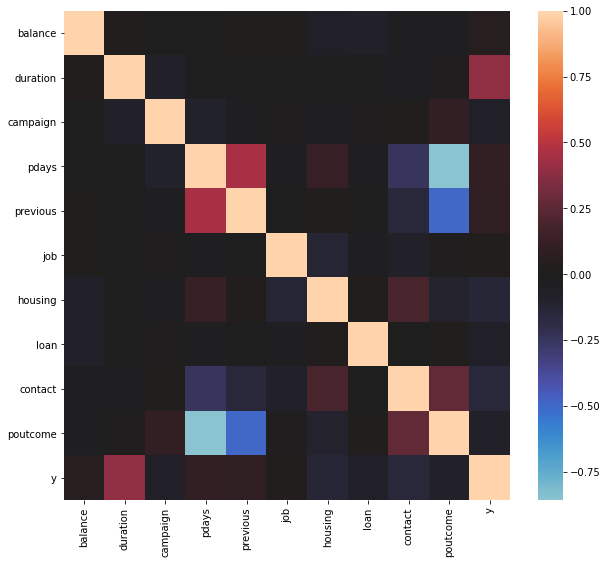

In [79]:
fig = plt.subplots(figsize = (10,9))
sns.heatmap(final_data.corr(),center=0)

# pdays and p outcome has very high correlation , multicollinearity problem could occur
# dropping p outcome column as it has a lesser score

In [80]:
final_data = final_data.drop('poutcome' , axis =1)

In [81]:
final_data

,balance,duration,campaign,pdays,previous,job,housing,loan,contact,y
0,2143,261,1,0,0,4,1,0,2,0
1,29,151,1,0,0,9,1,0,2,0
2,2,76,1,0,0,2,1,1,2,0
3,1506,92,1,0,0,1,1,0,2,0
4,1,198,1,0,0,11,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
45206,825,977,3,0,0,9,0,0,0,1
45207,1729,456,2,0,0,5,0,0,0,1
45208,5715,1127,5,184,3,5,0,0,0,1
45209,668,508,4,0,0,1,0,0,1,0


In [82]:
final_data.shape

(45211, 10)

# data visualization

<AxesSubplot:xlabel='age', ylabel='y'>

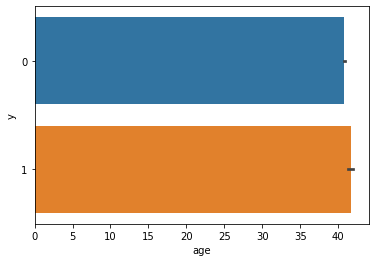

In [83]:
sns.barplot(x='age' , y='y' , data=data)

<AxesSubplot:xlabel='balance', ylabel='y'>

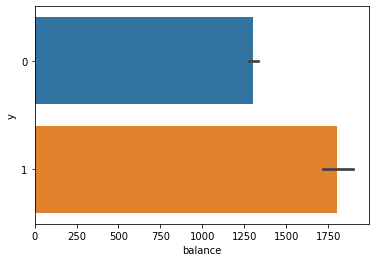

In [84]:
sns.barplot(x='balance' , y='y' , data=data)

<AxesSubplot:xlabel='y', ylabel='day'>

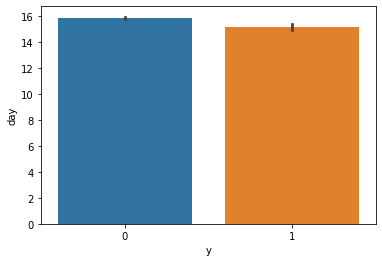

In [85]:
sns.barplot(x='y' , y='day' , data=data)

In [86]:
# day dosent seem to have much of a difference on wether the client subscribes or not

<AxesSubplot:xlabel='duration', ylabel='y'>

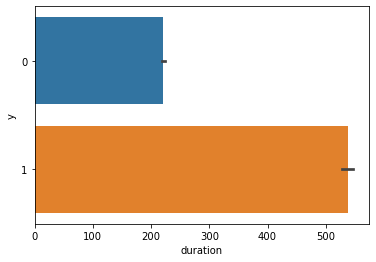

In [87]:
sns.barplot(x='duration' , y='y' , data=data)

<AxesSubplot:xlabel='campaign', ylabel='y'>

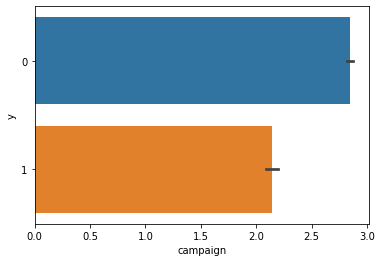

In [88]:
sns.barplot(x='campaign' , y='y' , data=data)

<AxesSubplot:xlabel='pdays', ylabel='y'>

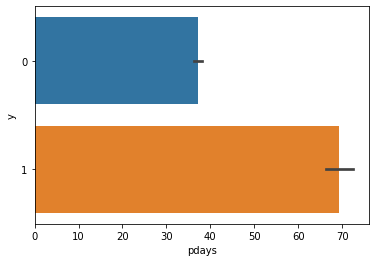

In [89]:
sns.barplot(x='pdays' , y='y' , data=data)

<AxesSubplot:xlabel='y', ylabel='previous'>

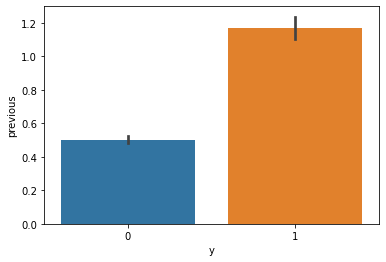

In [90]:
sns.barplot(x='y' , y='previous' , data=data)

<AxesSubplot:xlabel='y', ylabel='count'>

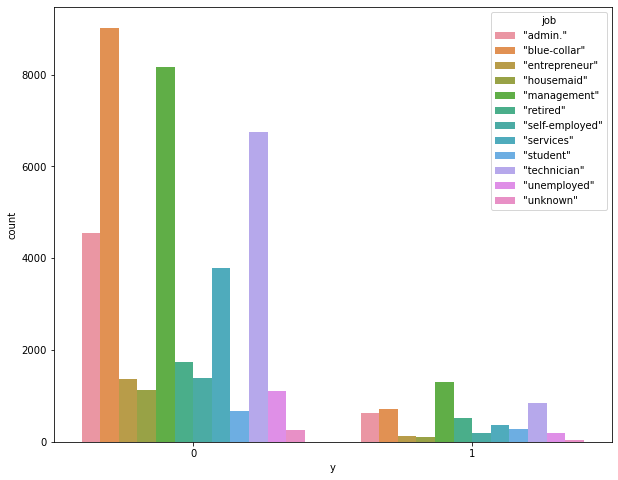

In [91]:
fig = plt.subplots(figsize=(10,8))
sns.countplot(x = 'y', data=data , hue='job')

<AxesSubplot:xlabel='y', ylabel='count'>

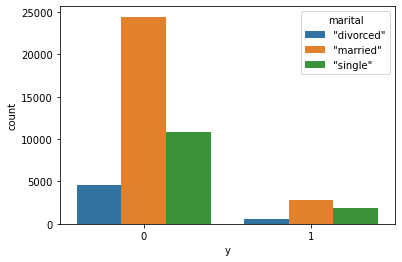

In [92]:
sns.countplot(x = 'y', data=data , hue='marital')

<AxesSubplot:xlabel='y', ylabel='count'>

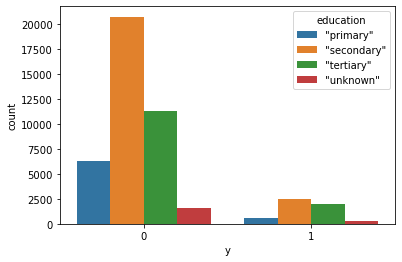

In [93]:
sns.countplot(x = 'y', data=data , hue='education')

<AxesSubplot:xlabel='y', ylabel='count'>

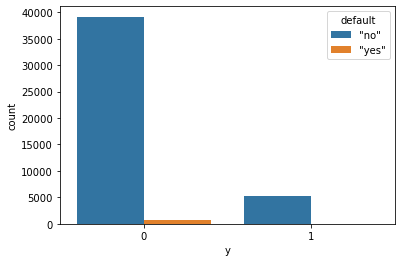

In [94]:
sns.countplot(x = 'y', data=data , hue='default')

<AxesSubplot:xlabel='y', ylabel='count'>

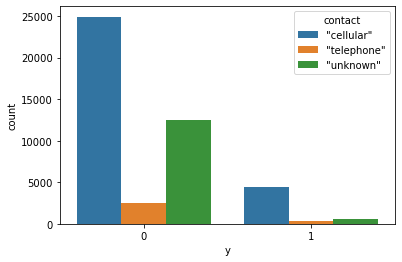

In [95]:
sns.countplot(x = 'y', data=data , hue='contact')

<AxesSubplot:xlabel='y', ylabel='count'>

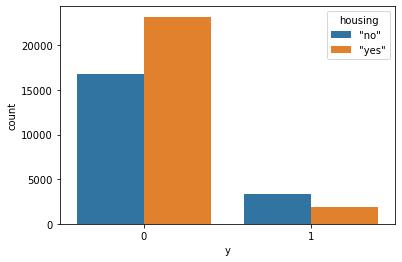

In [96]:
sns.countplot(x = 'y', data=data , hue='housing')

<AxesSubplot:xlabel='y', ylabel='count'>

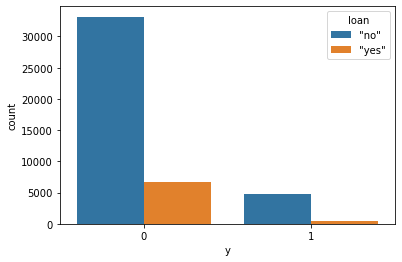

In [97]:
sns.countplot(x = 'y', data=data , hue='loan')

<AxesSubplot:xlabel='y', ylabel='count'>

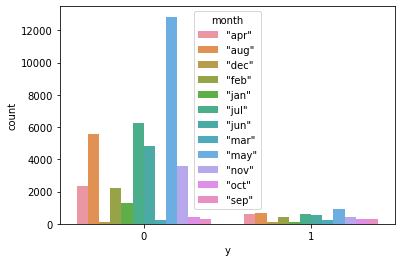

In [98]:
sns.countplot(x = 'y', data=data , hue='month')

<AxesSubplot:xlabel='y', ylabel='count'>

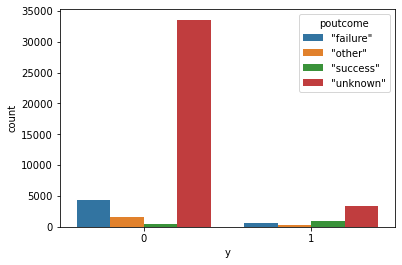

In [99]:
sns.countplot(x = 'y', data=data , hue='poutcome')

# Separating dependant and independant variable

In [100]:
final_data

,balance,duration,campaign,pdays,previous,job,housing,loan,contact,y
0,2143,261,1,0,0,4,1,0,2,0
1,29,151,1,0,0,9,1,0,2,0
2,2,76,1,0,0,2,1,1,2,0
3,1506,92,1,0,0,1,1,0,2,0
4,1,198,1,0,0,11,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
45206,825,977,3,0,0,9,0,0,0,1
45207,1729,456,2,0,0,5,0,0,0,1
45208,5715,1127,5,184,3,5,0,0,0,1
45209,668,508,4,0,0,1,0,0,1,0


In [101]:
X = final_data.iloc[:,0:9]

In [102]:
X

,balance,duration,campaign,pdays,previous,job,housing,loan,contact
0,2143,261,1,0,0,4,1,0,2
1,29,151,1,0,0,9,1,0,2
2,2,76,1,0,0,2,1,1,2
3,1506,92,1,0,0,1,1,0,2
4,1,198,1,0,0,11,0,0,2
...,...,...,...,...,...,...,...,...,...
45206,825,977,3,0,0,9,0,0,0
45207,1729,456,2,0,0,5,0,0,0
45208,5715,1127,5,184,3,5,0,0,0
45209,668,508,4,0,0,1,0,0,1


In [103]:
Y = final_data['y']

In [104]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

# splitting the data into train and test

In [105]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size = 0.80,random_state = 42)

# Building logistic regression model

In [106]:
LR = LogisticRegression(max_iter=100)

In [107]:
LR.fit(x_train, y_train)

C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [108]:
y_pred = LR.predict(x_test)

In [109]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
vals = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})

In [111]:
vals

,Actual value,Predicted value
3776,0,0
9928,0,0
33409,0,0
31885,0,0
15738,0,0
...,...,...
13353,0,0
38732,1,0
5654,0,0
3779,0,0


In [112]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix

# Accuracy score

In [113]:
metrics.accuracy_score(y_test, y_pred)

0.883777507464337

# Confusion matrix

In [114]:
matrix = confusion_matrix(y_test, y_pred)

In [115]:
matrix

array([[7753,  199],
       [ 852,  239]], dtype=int64)

Text(51.0, 0.5, 'True')

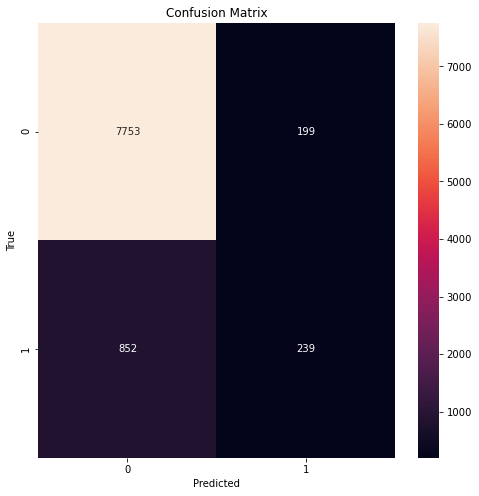

In [116]:
plt.subplots(figsize = (8,8))
sns.heatmap(matrix, annot=True,fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7952
           1       0.55      0.22      0.31      1091

    accuracy                           0.88      9043
   macro avg       0.72      0.60      0.62      9043
weighted avg       0.86      0.88      0.86      9043



In [118]:
#predict probabilities
pred_prob = LR.predict_proba(x_test)

In [119]:
pred_prob

array([[0.99049166, 0.00950834],
       [0.98769236, 0.01230764],
       [0.92671848, 0.07328152],
       ...,
       [0.98938603, 0.01061397],
       [0.99525038, 0.00474962],
       [0.98554549, 0.01445451]])

In [120]:
prob = pred_prob[:,1]

In [121]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [122]:
auc = roc_auc_score( y_test, prob )

In [123]:
auc

0.8332594098043808

# ROC CURVE

In [124]:
fpr, tpr, thresh = roc_curve(y_test, prob)

<function matplotlib.pyplot.show(close=None, block=None)>

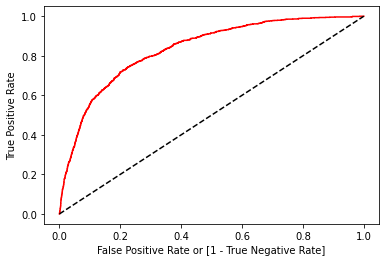

In [125]:
plt.plot(fpr, tpr, color='red', label='logistic Regression')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--')
plt.show